# Code in dolphins.py not same as code notebook

In [1]:
import random
import numpy
import re
import urllib

#####################################################################################################################

# malenames and femalenames initialized such that it extracts information from URLs and puts information into lists.
# Put above functions and other code to be used as global variable inside functions.
malenames = []
femalenames = []

# creates the text file directory path for the male and female lists for later extraction.
# put above functions and other code to be used as global variable inside functions.
male_dir_path = '/Users/labuser/comp-phys/'      #"C:/Users/James/Documents/GitHub/comp-phys/" # "/Users/labuser/comp-phys/" for mac
male_filenm = male_dir_path + 'malenames.txt'
female_dir_path = '/Users/labuser/comp-phys/'    #"C:/Users/James/Documents/GitHub/comp-phys/" # "/Users/labuser/comp-phys/" for mac
female_filenm = female_dir_path + 'femalenames.txt'

def findnames(code, gender):
    matchstring = 'nameDetails">.*</span>'
    if gender == 'M':
        namelist = []
        for item in code:
            x = re.findall(matchstring, item)
            if len(x) > 0:
                namelist.append(x[0])
        for stuff in namelist:
            new_stuff = stuff.replace('nameDetails">', "")
            newnew_stuff = new_stuff.replace('</span>', "")
            malenames.append(newnew_stuff)
    else:
        namelist = []
        for item in code:
            x = re.findall(matchstring, item)
            if len(x) > 0:
                namelist.append(x[0])
        for stuff in namelist:
            new_stuff = stuff.replace('nameDetails">', "")
            newnew_stuff = new_stuff.replace('</span>', "")
            femalenames.append(newnew_stuff)
            
def namegen(sex):
    x = 0
    y = 0
    if sex == 'M':
        with open(male_filenm,"r") as f:
            malenames = eval(f.read())
        while x < len(malenames)-1:
            yield malenames[x]
            x += 1
            malenames[x]
    else:
        with open(female_filenm, "r") as f:
            femalenames = eval(f.read())
        while y < len(femalenames):
            yield femalenames[y]
            y += 1
            femalenames[x]

# Extracts male and female names from URL.
i = 1
maleurl = "http://www.prokerala.com/kids/baby-names/boy/page-1.html"
femaleurl = "http://www.prokerala.com/kids/baby-names/girl/page-1.html"
while len(malenames) < 105:    #7880
    x = maleurl.replace('1', str(i))
    xinfile = urllib.urlopen(x)
    xhtml = xinfile.readlines()
    xinfile.close()
    findnames(xhtml, 'M')
    i += 1

j = 1
while len(femalenames) < 105:    #5974
    y = femaleurl.replace('1', str(j))
    yinfile = urllib.urlopen(y)
    yhtml = yinfile.readlines()
    yinfile.close()
    findnames(yhtml, 'F')
    j += 1
    
# Make male and female names list extracted from websites text file that is writable.
with open(male_filenm, "w") as f:
    f.write(str(malenames))
with open(female_filenm, "w") as f:
    f.write(str(femalenames))
    
#####################################################################################################################

# Set male and female generator equal to namegen() with respective genders to make use of .next() inside function.
malegenerator = namegen('M')
femalegenerator = namegen('F')

# Instantiate elder dolphins (with arbitrary parents).
elder_dolphins = ['Shakira', 'Jency', 'Lothar', 'JinBiao']
dolphinstances = {elder_dolphins[0]: Dolphins(elder_dolphins[0], 'F', 'Jen', 'Sven'),\
                  elder_dolphins[1]: Dolphins(elder_dolphins[1], 'F', 'Jan', 'Stan'),\
                  elder_dolphins[2]: Dolphins(elder_dolphins[2], 'M', 'June', 'Stoon'),\
                  elder_dolphins[3]: Dolphins(elder_dolphins[3], 'M', 'Jill', 'Skrill')}

def MarvinGaye(partner1, partner2):
    if partner1.sex == 'M':
        MalePartner = partner1.name
    else:
        FemalePartner = partner1.name
    if partner2.sex == 'M':
        MalePartner = partner2.name
    else:
        FemalePartner = partner2.name
    if partner1.legal(partner2) == True:
        child_sex = random.sample(['M', 'F'], 1)[0]
        if child_sex == 'M':
            child_name = malegenerator.next()
            dolphinstances[child_name] = Dolphins(child_name, child_sex, FemalePartner, MalePartner)
            partner1.refracperiod = 0
            partner2.refracperiod = 0
        else:
            child_name = femalegenerator.next()
            dolphinstances[child_name] = Dolphins(child_name, child_sex, FemalePartner, MalePartner)
            partner1.refracperiod = 0
            partner2.refracperiod = 0
        
        
class Dolphins:
    def __init__(self, name, sex, mother, father):
        self.name = name
        self.sex = sex
        self.age = 0
        self.mother = mother
        self.father = father
        self.death = random.gauss(35, 5)
        self.refracperiod = 0
        
## Aging method: updates the age attribute each year.        
    def agify(self):                            
        self.age += 1
        self.refracperiod += 1
        
## Procreation method: determines whether a dolphin is allowed to procreate with another.        
    def legal(self, partner):                   
        if (self.age >= 8)\
        and (partner.age >= 8)\
        and (abs(self.age - partner.age) <= 10)\
        and (self.sex != partner.sex)\
        and (self.father != partner.father)\
        and (self.mother != partner.mother)\
        and (self.refracperiod > 5)\
        and (partner.refracperiod > 5):
            proc = True
        else:
            proc = False
        return proc

#####################################################################################################################


In [25]:
dolphinstances["Shakira"].agify()
dolphinstances['Shakira'].age
dolphinstances["Lothar"].agify()
dolphinstances['Lothar'].age
dolphinstances['Shakira'].legal(dolphinstances['Lothar'])

True

In [26]:
MarvinGaye(dolphinstances["Shakira"], dolphinstances['Lothar'])

In [27]:
print child_dict

{'Aaban': <__main__.Dolphins instance at 0x102d97a28>, 'Aadam': <__main__.Dolphins instance at 0x102f043b0>, 'Aabheer': <__main__.Dolphins instance at 0x102f0e518>}


# Data Retrieval from http://www.prokerala.com/kids/baby-names/boy/page-1.html and http://www.prokerala.com/kids/baby-names/girl/page-1.html
    Working data retrieval code and name generator based on gender.  Added to program above and copied to dolphins.py.

In [1]:
import re
import urllib
import webbrowser
from pdb import set_trace

malenames = []
femalenames = []
male_dir_path = "C:/Users/James/Documents/GitHub/comp-phys/"   # "C:/Users/James/Documents/GitHub/comp-phys/"      # "/Users/labuser/comp-phys/" for mac
male_filenm = male_dir_path + 'malenames.txt'
female_dir_path = "C:/Users/James/Documents/GitHub/comp-phys/"    # "C:/Users/James/Documents/GitHub/comp-phys/"    # "/Users/labuser/comp-phys/" for mac
female_filenm = female_dir_path + 'femalenames.txt'

def findmalenames(code):
    matchstring = 'nameDetails">.*</span>'
    namelist = []
    for item in code:
        x = re.findall(matchstring, item)
        if len(x) > 0:
            namelist.append(x[0])
    for stuff in namelist:
        new_stuff = stuff.replace('nameDetails">', "")
        newnew_stuff = new_stuff.replace('</span>', "")
        malenames.append(newnew_stuff)

def findfemalenames(code):
    matchstring = 'nameDetails">.*</span>'
    namelist = []
    for item in code:
        x = re.findall(matchstring, item)
        if len(x) > 0:
            namelist.append(x[0])
    for stuff in namelist:
        new_stuff = stuff.replace('nameDetails">', "")
        newnew_stuff = new_stuff.replace('</span>', "")
        femalenames.append(newnew_stuff)

########################################################################################        

def namegen(sex):
    x = 0
    y = 0
    if sex == 'M':
        with open(male_filenm,"r") as f:
            malenames = eval(f.read())
        while x < len(malenames)-1:
            yield malenames[x]
            x += 1
    else:
        with open(female_filenm, "r") as f:
            femalenames = eval(f.read())
        while y < len(femalenames):
            yield femalenames[y]
            y += 1

########################################################################################  
            
i = 1
maleurl = "http://www.prokerala.com/kids/baby-names/boy/page-1.html"
femaleurl = "http://www.prokerala.com/kids/baby-names/girl/page-1.html"
while len(malenames) < 105:    #7880
    x = maleurl.replace('1', str(i))
    xinfile = urllib.urlopen(x)
    xhtml = xinfile.readlines()
    xinfile.close()
    findmalenames(xhtml)
    i += 1

j = 1
while len(femalenames) < 105:    #5974
    y = femaleurl.replace('1', str(j))
    yinfile = urllib.urlopen(y)
    yhtml = yinfile.readlines()
    yinfile.close()
    findfemalenames(yhtml)
    j += 1
    

with open(male_filenm, "w") as f:
    f.write(str(malenames))
with open(female_filenm, "w") as f:
    f.write(str(femalenames))

In [4]:
import random
import numpy
import re
import urllib
from pdb import set_trace

#####################################################################################################################

# malenames and femalenames initialized such that it extracts information from URLs and puts information into lists.
# Put above functions and other code to be used as global variable inside functions.
malenames = []
femalenames = []

# creates the text file directory path for the male and female lists for later extraction.
# put above functions and other code to be used as global variable inside functions.
male_dir_path = "C:/Users/James/Documents/GitHub/comp-phys/"        # PC: "C:/Users/James/Documents/GitHub/comp-phys/"
male_filenm = male_dir_path + 'malenames.txt'                       # Mac: "/Users/labuser/comp-phys/"
female_dir_path = "C:/Users/James/Documents/GitHub/comp-phys/"
female_filenm = female_dir_path + 'femalenames.txt'

def findnames(code, gender):
    matchstring = 'nameDetails">.*</span>'
    if gender == 'M':
        namelist = []
        for item in code:
            x = re.findall(matchstring, item)
            if len(x) > 0:
                namelist.append(x[0])
        for stuff in namelist:
            new_stuff = stuff.lstrip('nameDetails">').rstrip('</span>')
            malenames.append(new_stuff)
    else:
        namelist = []
        for item in code:
            x = re.findall(matchstring, item)
            if len(x) > 0:
                namelist.append(x[0])
        for stuff in namelist:
            new_stuff = stuff.lstrip('nameDetails">').rstrip('</span>')
            femalenames.append(new_stuff)

def namegen(sex):
    x = 0
    y = 0
    if sex == 'M':
        with open(male_filenm,"r") as f:
            malenames = eval(f.read())
        while x < len(malenames)-1:
            yield malenames[x]
            x += 1
    else:
        with open(female_filenm, "r") as f:
            femalenames = eval(f.read())
        while y < len(femalenames):
            yield femalenames[y]
            y += 1

# Extracts male and female names from URL.
i = 1
maleurl = "http://www.prokerala.com/kids/baby-names/boy/page-1.html"
femaleurl = "http://www.prokerala.com/kids/baby-names/girl/page-1.html"
while len(malenames) < 1000:    #Male Names Max: 7880
    x = maleurl.replace('1', str(i))
    xinfile = urllib.urlopen(x)
    xhtml = xinfile.readlines()
    xinfile.close()
    findnames(xhtml, 'M')
    i += 1

j = 1
while len(femalenames) < 1000:    # Female Names Max: 5974
    y = femaleurl.replace('1', str(j))
    yinfile = urllib.urlopen(y)
    yhtml = yinfile.readlines()
    yinfile.close()
    findnames(yhtml, 'F')
    j += 1

# Make male and female names list extracted from websites text file that is writable.
with open(male_filenm, "w") as f:
    f.write(str(malenames))
with open(female_filenm, "w") as f:
    f.write(str(femalenames))

# Check if particular file is in directory

In [2]:
import random
import numpy as np
import re
import urllib
import matplotlib.pyplot as plt
from pdb import set_trace
import os.path


male_path = "/Users/labuser/comp-phys/malenames.txt"
os.path.isfile(male_path)

True

In [5]:
if True:
    
else:
    print 'Ha'

IndentationError: expected an indented block (<ipython-input-5-9b0d1ad09ced>, line 3)

# Part C - Geneology

Trial No. 1
##################################################
Entering year 25 with 11 dolphins, with 0 breeding.
##################################################
Entering year 50 with 15 dolphins, with 1 breeding.
##################################################
Entering year 75 with 18 dolphins, with 0 breeding.
At year 100, there are 8 living dolphins.
there have been 35 births, in total.
##################################################
At year 149, there are 1 living dolphins.
Trial No. 2
##################################################
Entering year 25 with 10 dolphins, with 0 breeding.
##################################################
Entering year 50 with 14 dolphins, with 2 breeding.
##################################################
Entering year 75 with 19 dolphins, with 0 breeding.
At year 100, there are 12 living dolphins.
there have been 38 births, in total.
##################################################
At year 149, there are 2 living dolphins.
Trial No. 3
#

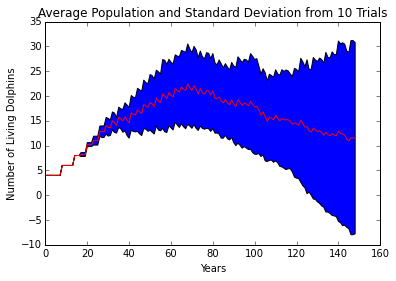

In [39]:
#### NOTICE: When I have a comment that is general (i.e. a comment next to malenames and femalenames, it applied to both genders) ####
#### Similar to m_keys and f_keys. ####

""" Program creates a dolphin model that models a dolphin population over time.  Starting with four initial dolphins, the dolphin population is tracked such that
    if the dolphin population dies out prematurely due to lack of males, it increases the likelihood of male child production.  The program pulls various names
    from an internet source and uses these names to apply to the new-born dolphins.  After the dolphin program has run, it provides a graph of average number of
    dolphins over the span of 149 years. It also provides the average minimum probability of producing males such that the dolphin population does not cease.
    
    This program file corresponds to PART B of the project.
"""

import random
import numpy as np
import re
import urllib
import matplotlib.pyplot as plt
import os.path                  # Used to check if file is in directory/if file exists

from pdb import set_trace

#####################################################################################################################

# malenames and femalenames initialized such that it extracts information from URLs and puts information into lists.
# Put above functions and other code to be used as global variable inside functions.
malenames = []
femalenames = []

# Creates the text file directory path for the male and female lists for later extraction.
# Put above functions and other code to be used as global variable inside functions.
male_dir_path = "C:/Users/James/Documents/GitHub/comp-phys/"        # PC: "C:/Users/James/Documents/GitHub/comp-phys/"
male_filenm = male_dir_path + 'malenames.txt'       # Mac: "/Users/labuser/comp-phys/"
female_dir_path = "C:/Users/James/Documents/GitHub/comp-phys/"
female_filenm = female_dir_path + 'femalenames.txt'

# findnames() finds the names from the website and adds them to a list, malenames.  Same happens for femalenames
def findnames(code, gender):
    matchstring = 'nameDetails">.*</span>'
    if gender == 'M':
        namelist = []
        for item in code:
            x = re.findall(matchstring, item)
            if len(x) > 0:
                namelist.append(x[0])
        for stuff in namelist:
            new_stuff = stuff.lstrip('nameDetails">').rstrip('</span>')
            malenames.append(new_stuff)
    else:
        namelist = []
        for item in code:
            x = re.findall(matchstring, item)
            if len(x) > 0:
                namelist.append(x[0])
        for stuff in namelist:
            new_stuff = stuff.lstrip('nameDetails">').rstrip('</span>')
            femalenames.append(new_stuff)

# namegen() opens up an existing .txt file with a series of names and yields a name from the file everytime it is called.
def namegen(sex):
    x = 0
    y = 0
    if sex == 'M':
        with open(male_filenm,"r") as f:
            malenames = eval(f.read())
        while x < len(malenames)-1:
            yield malenames[x]
            x += 1
    else:
        with open(female_filenm, "r") as f:
            femalenames = eval(f.read())
        while y < len(femalenames):
            yield femalenames[y]
            y += 1

# Extracts male and female names from URL/HTML code.
if os.path.isfile(male_filenm) == True:                 # Used to check if file exists.
    ''
else:
    i = 1
    maleurl = "http://www.prokerala.com/kids/baby-names/boy/page-1.html"
    femaleurl = "http://www.prokerala.com/kids/baby-names/girl/page-1.html"
    while len(malenames) < 7880:    #Male Names Max: 7880
        x = maleurl.replace('1', str(i))
        xinfile = urllib.urlopen(x)
        xhtml = xinfile.readlines()
        xinfile.close()
        findnames(xhtml, 'M')
        i += 1
    
    j = 1
    while len(femalenames) < 5974:    # Female Names Max: 5974
        y = femaleurl.replace('1', str(j))
        yinfile = urllib.urlopen(y)
        yhtml = yinfile.readlines()
        yinfile.close()
        findnames(yhtml, 'F')
        j += 1
    
    # Make male and female names list extracted from websites text file that is writable.
    with open(male_filenm, "w") as f:
        f.write(str(malenames))
    with open(female_filenm, "w") as f:
        f.write(str(femalenames))

#####################################################################################################################
#####################################################################################################################

# MarvinGaye() makes sure the dolphins can get it on (have a baby).  It calls the method legal() from Dolphins class and checks for eligibility of dolphin procreation.
def MarvinGaye(mdictionary, fdictionary, partner1, partner2, malegen, femalegen, prob):
    if partner1.sex == 'M':
        MalePartner = partner1.name
    else:
        FemalePartner = partner1.name
    if partner2.sex == 'M':
        MalePartner = partner2.name
    else:
        FemalePartner = partner2.name
    if partner1.legal(partner2) == True:
        p = random.random()                 # Creates random numbers between 0 and 1.
        if p < prob:                        # Used to control probability of producing male calf.
            child_name = malegen.next()     # malegen.next() gives the next child name in the list of males from the .txt file.
            mdictionary[child_name] = Dolphins(child_name, 'M', FemalePartner, MalePartner)
            partner1.refracperiod = 0       # Resets procreating dolpins' refractory period so they cannot procreate until it is over
            partner2.refracperiod = 0
        else:
            child_name = femalegen.next()
            fdictionary[child_name] = Dolphins(child_name, 'F', FemalePartner, MalePartner)
            partner1.refracperiod = 0
            partner2.refracperiod = 0

# Dolphins class gives a particular dolphin attributes, allows the dolphin to age, and checks if the dolphin is able to procreate.
class Dolphins:
    def __init__(self, name, sex, mother, father):
        self.name = name
        self.sex = sex
        self.age = 0
        self.mother = mother
        self.father = father
        self.death = random.gauss(35, 5)
        self.refracperiod = 0
    
    ## Aging method: updates the age attribute each year.
    def agify(self):
        self.age += 1
        self.refracperiod += 1
    
    ## Procreation method: determines whether a dolphin is allowed to procreate with another.
    def legal(self, partner):
        if (self.age >= 8)\
        and (partner.age >= 8)\
        and (abs(self.age - partner.age) <= 10)\
        and (self.sex != partner.sex)\
        and (self.father != partner.father)\
        and (self.mother != partner.mother)\
        and (self.refracperiod > 5)\
        and (partner.refracperiod > 5)\
        and (self.age <= self.death)\
        and (partner.age <= partner.death):
            proc = True
            return proc
        else:
            proc = False
            return proc

# Instantiate elder dolphins (with arbitrary parents).
elder_dolphins = ['Shakira', 'Jency', 'Lothar', 'JinBiao']

#####################################################################################################################
#####################################################################################################################
#####################################################################################################################

m_dolphins = []         # Initialized list of male dolphins to check eligibility with female dolphins.
f_dolphins = []
living = []             # Initialized to track number of living dolphins each year of each trial.
min_prob_list = []      # Initialized list to keep track of probability the dolphin population will reach year 149.


# for loop used to match length of list for dictionary tracking in the following for loop.
for i in range(10):     # for loop used to make length of each list eligible for later iteration.
    m_dolphins.append('hola'+str(i))
    f_dolphins.append('hola'+str(i))
    living.append('hola'+str(i))

# Heart of program.
for trial in range(10):                     # First for loop allows for number of trials desired
    probability = 0.
    while probability <= .5:                # First while loop determines if the dolphin population will reach year 149, if so, run the following trials until trial 10.
        # Set male and female generator equal to namegen() with respective genders to make use of .next() inside function.
        malegenerator = namegen('M')
        femalegenerator = namegen('F')
        m_dolphins[trial] = {elder_dolphins[2]: Dolphins(elder_dolphins[2], 'M', 'June', 'Stoon'), elder_dolphins[3]: Dolphins(elder_dolphins[3], 'M', 'Jill', 'Skrill')}
        f_dolphins[trial] = {elder_dolphins[0]: Dolphins(elder_dolphins[0], 'F', 'Jen', 'Sven'), elder_dolphins[1]: Dolphins(elder_dolphins[1], 'F', 'Jan', 'Stan')}
        years = 0
        deaths = []
        living[trial] = []
        while years < 150:                  # Second while loop used to run program for 149 years.
            m_keys = m_dolphins[trial].keys()           # Takes keys from m_dolphins dictionary
            f_keys = f_dolphins[trial].keys()
            for dolphin in m_keys:                      # Used to compared m_keys (male dolphins) with f_keys (female dolphins) and see if they can procreate.  If so, MarvinGaye() will instantiate the new child.
                for partner in f_keys:
                    cool = MarvinGaye(m_dolphins[trial], f_dolphins[trial], m_dolphins[trial][dolphin], f_dolphins[trial][partner], malegenerator, femalegenerator, probability)
            # Checks if dolphins are considered dead after checking procreation eligibility.
            for dead in m_keys:
                m_dolphins[trial][dead].agify()
                if m_dolphins[trial][dead].age >= m_dolphins[trial][dead].death:        # Compares current age with pre-determined death age
                    if dead not in deaths:
                        deaths.append(dead)
            for dead in f_keys:
                f_dolphins[trial][dead].agify()
                if f_dolphins[trial][dead].age >= f_dolphins[trial][dead].death:
                    if dead not in deaths:
                        deaths.append(dead)
            m_keys2 = m_dolphins[trial].keys()          # m_keys2 corresponds to dolphins after procreation check/after a year has passed.  Does not include deaths.
            f_keys2 = f_dolphins[trial].keys()
            living[trial].append(len(m_keys2) + len(f_keys2) - len(deaths))
            # The following information is stored such that if the program breaks from the loop, it can continue for 10 trials and print the information associated with the checkpoints.
            if years == 25:
                years25 = (years, len(m_keys) + len(f_keys) - len(deaths), abs(len(m_keys2)+len(f_keys2) - len(m_keys)-len(f_keys)))
            if years == 50:
                years50 = (years, len(m_keys) + len(f_keys) - len(deaths), abs(len(m_keys2)+len(f_keys2) - len(m_keys)-len(f_keys)))
            if years == 75:
                years75 = (years, len(m_keys) + len(f_keys) - len(deaths), abs(len(m_keys2)+len(f_keys2) - len(m_keys)-len(f_keys)))
            if years == 100:
                years100 = (years, len(m_keys2) + len(f_keys2) - len(deaths), len(m_keys2) + len(f_keys2) - 4)
            if years == 125:
                years125 = (years, len(m_keys) + len(f_keys) - len(deaths), abs(len(m_keys2)+len(f_keys2) - len(m_keys)-len(f_keys)))
            if years == 149:
                years149 = (years, len(m_keys2) + len(f_keys2) - len(deaths))
                min_prob_list.append(probability)       # If year 149 is reached, the probability at year 149 is added to the min_prob_list list.  This means at least one dolphin survived the apocalypse.
                probability = 1
                break
            years += 1
            if len(m_keys2) + len(f_keys2) - len(deaths) == 0:      # If dolphin population has died out, increase chances of creating a male dolphin for increased procreation.
                probability += .01
                break
        if years == 149:
            print 'Trial No.', trial+1
        #    if years % 25 == 0:
            print "#"*50
            print "Entering year {:d} with {:d} dolphins, with {:d} breeding.".format(*years25)
            print "#"*50
            print "Entering year {:d} with {:d} dolphins, with {:d} breeding.".format(*years50)
            print "#"*50
            print "Entering year {:d} with {:d} dolphins, with {:d} breeding.".format(*years75)
        #    if years == 100:
            print "At year {:d}, there are {:d} living dolphins.\nthere have been {:d} births, in total.".format(*years100)
        #    if years == 149:
            print "#"*50
            print "At year {:d}, there are {:d} living dolphins.".format(*years149)

print


avg_std = []
for i in range(149):
    avg_std.append((np.mean([j[i] for j in living]), np.std([j[i] for j in living])))
std_above = [i + j for i, j in avg_std]
std_below = [i - j for i, j in avg_std]
avg = [i[0] for i in avg_std]
min_prob = np.mean(min_prob_list)*100
print 'Minimum probability:', min_prob, '%'

#####################################################################################################################
#####################################################################################################################
#####################################################################################################################
#####################################################################################################################

# Plots the average number of dolphins over a timespan
plt.title('Average Population and Standard Deviation from 10 Trials')
x = np.arange(0, years, 1)
plt.plot(x, avg, 'r')
plt.xlabel('Years')
plt.ylabel('Number of Living Dolphins')
plt.fill_between(x, std_below, std_above)

plt.show()



In [47]:
cm = m_dolphins[0]['Aadesh'].mother
cf = m_dolphins[0]['Aadesh'].father
print cm, cf

for father in m_dolphins[0]:
    for mother in f_dolphins[0]:
        if m_dolphins[0][father].father == cf:
            print father
#         if m_dolphins[0][mother].mother == cm:
#             print 'Cool Beans'

Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadesh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
Aadh
